# Clustering with k-means

So far, we focused on algorithms that **try to model the relationship between a set of input variables X and a target variable y**. These are supervised learning tasks because we are learning the parameters of our models using examples of this X/y relationship. In this subject, we will see examples of tasks that don't have an explicit target variable y to predict. These are **unsupervised learning tasks**, and we say that the data is unlabeled since it doesn't contain this y variable.

One example of unsupervised learning is **clustering** which is the task of finding groups of similar observations in our data set. This is an unsupervised learning task because we don't know in advance what these groups are and we don't have examples of data points and group assignments. Another example is **dimensionality reduction** which is the task of reducing the dimensionality of our data set i.e. its number of features. For instance, in the next exercise, you will use a technique called **principal component analysis (PCA)** to create a 2-dimensional plot of the images from the MNIST data set.

In this unit, we will learn about the k-means algorithm which is one way to address clustering. We will first describe the algorithm and then implement it using Scikit-learn.

### k-means algorithm

In clustering tasks, our goal is to find groups of similar data points. This is an unsupervised learning task because we have to learn these cluster assignments by ourselves. There are many ways to define what a cluster is and hence many different clustering algorithms. We will now learn about the k-means one which is a simple but efficient way to perform clustering.

The goal of k-means is to form k groups that **minimize a measure called inertia** which is simply defined as the sum of the squared distances between each point and the center of their cluster. In the k-means jargon, these centers are called the **centroids**. The k-means algorithm minimizes inertia by following a simple procedure that can be summarized in three steps.

In [36]:
from IPython.display import Image
Image(url='https://d7whxh71cqykp.cloudfront.net/uploads/image/data/3933/kmeans-ground-truth.svg')

Visually, it's clear that there are three groups in our data. However, the data is not labeled, and we only have access to the location of each point on the plot. Our goal to find these three clusters and assign each data point to the correct one.

In the k-means algorithm from above, the first step is to choose k initial centroids. There are many ways to do that. A simple strategy is to pick randomly k data points from our data set and choose them as the centroids.

In [37]:
Image(url='https://d7whxh71cqykp.cloudfront.net/uploads/image/data/3934/kmeans-init.svg')

In this image, we randomly selected three data points and created the centroids at their location (marked with a star).

After this initialization step, the k-means algorithm from above iteratively repeats two steps. First, it matches each point to the closest centroid


In [38]:
Image(url='https://d7whxh71cqykp.cloudfront.net/uploads/image/data/3935/kmeans-1-matching.svg')

Each data point is plotted with a different color depending on the closest centroid. For instance, data points matched with the centroid in the lower right corner are shown in blue. As we can see, the centroids are not necessarily at the center of their cluster of points. Hence, the next step is to recenter the three centroids

In [39]:
Image(url='https://d7whxh71cqykp.cloudfront.net/uploads/image/data/3936/kmeans-1-centering.svg')

We can now repeat this process of matching data points and recentering centroids until the process stabilizes



In [40]:
Image(url='https://d7whxh71cqykp.cloudfront.net/uploads/image/data/3937/kmeans-iteration2.png')

In [41]:
Image(url='https://d7whxh71cqykp.cloudfront.net/uploads/image/data/3938/kmeans-iteration3.png')

As we can see, the number of points that move from one cluster to another one decreases after each iteration, and the matching step does not lead to any new assignments at iteration 4



In [42]:
Image(url='https://d7whxh71cqykp.cloudfront.net/uploads/image/data/3939/kmeans-iteration4.png')

Since there are no new assignments, the centroids are already at the center of their cluster, and we say that the algorithm converged.

The k-means algorithm works well for this example because all of its underlying assumptions are met. For instance, the clusters have a nice rounded shape, and we know their number in advance. However, this is not always the case - see Demonstration of k-means assumptions from Scikit-learn : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html

### Scikit-learn implementation

Now that we know the basic idea behind k-means, let's see how to implement it with Scikit-learn. We will use the iris data set in an unsupervised learning scenario: our goal is to find groups of similar flowers based only on their petal and sepal length/width values.

Let's start by loading the data set with the load_iris() function from Scikit-learn

In [43]:
from sklearn import datasets

# Load data set
iris = datasets.load_iris()

# Load array of input values X
X = iris['data']

In this code, we load the data into an iris variable and extract the four features in an X array. Again, the flowers are not labeled in our scenario. However, we saw in a previous unit that the original iris data set contains flowers from three different types: setosa, Versicolor, and Virginica. Here is a plot that we generated in a previous unit using these labels

In [44]:
Image(url='https://d7whxh71cqykp.cloudfront.net/uploads/image/data/3940/multiclass-iris.svg')

Again, there are no "correct" labels in our scenario, and the k-means algorithm can return other clusters. However, it will be interesting to compare our results visually to this classification from the original data set.

Let's run the algorithm. Scikit-learn provides a KMeans object with a n_clusters parameter to set the number of clusters


In [45]:
from sklearn.cluster import KMeans

# Create k-means object
kmeans = KMeans(
    n_clusters=3,
    random_state=0 # Fix results
)

In [46]:
# Fit it to the data
kmeans.fit(X, y=None);

Again, k-means is an unsupervised learning method. Hence, the fit() function doesn't take into account the y parameter. In the code from above, we explicitly set y=None when calling the function for clarity.

In [47]:
# Get clusters
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Similarly, we can obtain the location of the centroids with a cluster_centers_ attribute

In [48]:
# Get centroids
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

The attribute is an array with one entry for each centroid and one column for each feature in X. Note that we can also use the predict() function to match new data points to these centroids

In [49]:
# Match new data points to the closest centroids
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In our case, there are four variables, so it's difficult to plot the results using all the variables. However, we can create a 2-dimensional plot similar to the one from above using only the petal lengths and widths

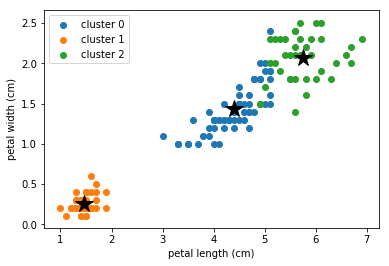

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot clusters
for cluster in [0, 1, 2]:
    # Get points in this cluster
    idx = (kmeans.labels_ == cluster)

    # Plot points
    plt.scatter(
        X[idx, 2], # Third column: petal length
        X[idx, 3], # Fourth column: petal width
        label='cluster {}'.format(cluster)
    )

    # Plot centroid
    centroid = kmeans.cluster_centers_[cluster]
    plt.plot(centroid[2], centroid[3], marker='*', color='black', markersize=18)

# Add legend and labels
plt.legend()
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In this code, we plot each cluster using a for loop. At each iteration, we create a boolean array idx with True values for data points in the cluster using a binary condition on the labels assigned by k-means. Then, we plot the petal length/width values by selecting the corresponding rows and columns in the feature matrix X. Finally, we add a marker for each centroid with the plot() function and the marker attribute. Again, we need to select the columns that correspond to the petal length/width attributes.

**It's interesting to see how close these results are to the plot with the original labels from above.**

### Summary

In this unit, we saw how to solve clustering tasks using **k-means**. One of the main advantages of this algorithm is that it **scales well to large data sets**. However, note that **Scikit-learn implements many other clustering methods** that can be better in some cases. For a comparison of the different methods, you can check the Overview of clustering methods table from Scikit-learn.https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods

In the next exercise, we will experiment with the k-means algorithm to cluster gambling crimes form the city of Chicago.

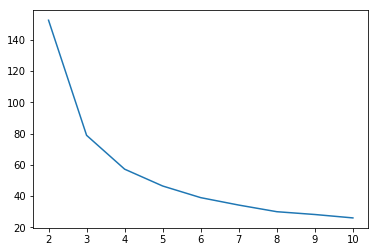

In [51]:
import pandas as pd

results = []
for k in range(2, 11):
    kmeans = KMeans(
        n_clusters = k, 
        random_state=0
    )
    kmeans.fit(X, y=None)
    results.append({
        'k': k,
        'inertia': kmeans.inertia_
    })
results = pd.DataFrame(results)
plt.plot(results.k, results.inertia)
plt.show();

Well done! After plotting the curve, you would need to spot the "knee" or the bend of the curve. Sometimes it's hard to accurately spot it using visual inspection. For that, you might need to devise a detection procedure:

> - If the curve is smooth, you can draw two tangent lines on each side of the curve and spot the knee from the intersection of these two lines.
> - You can also perform two linear fits and find their intersection. The first line is a linear fit of the first few points on the left-hand side of the curve, and the second line is a linear fit of the last few points on the right-hand side of the curve.
> - There are also some libraries that automatically detect the knee. For example, Yellowbrick has a built-in implementation of the knee point detection algorithm, a.k.a. "kneedle" algorithm to spot the optimal k.

Note that an estimate of the optimal k using visual inspection is often enough.

### Chicago gambling crimes (4-6-2)
In this first part, you will work on a data set of gambling crimes from the Chicago data portal. The data was collected between 2001 and 2017 and has more than ten thousand observations with several variables including the location of the crime (latitude and longitude). The goal is to use these two variables to group crimes into eight areas that historically have a lot of gambling crimes.

# Dimensionality reduction with PCA

In this unit, we will learn about dimensionality reduction which is **another kind of unsupervised learning task**. In particular, we will discuss **principal component analysis (PCA)** which is one way to address dimensionality reduction. This time, we will work on the wine data which contains 13 variables, and we will try to visualize it by creating a low dimensional representation using PCA.

Before applying PCA to the wine data using Scikit-learn estimators, let's start by discussing the issues related to plotting high dimensional data sets and see how PCA addresses them.

### Visualize high-dimensional data sets



In [52]:
import pandas as pd

# Load data
data_df = pd.read_csv('wine-data.csv')

# First five rows
data_df.head()

,kind,alcohol,malic acid,ash,alkalinity,magnesium,phenols,flavonoids,nf phenols,pas,color,fue,od2380/315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


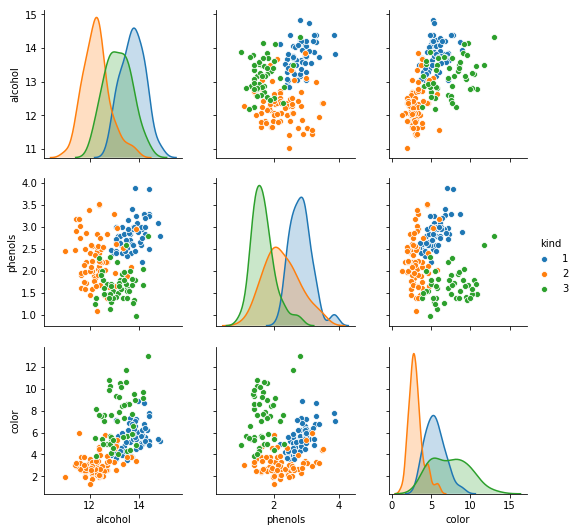

In [53]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Create pairplot
sns.pairplot(
    data_df,
    # Variables on the x-axes
    x_vars=['alcohol', 'phenols', 'color'],
    # Variables on the y-axes
    y_vars=['alcohol', 'phenols', 'color'],
    # Use a different color for each kind of wine
    hue='kind'
)
plt.show()

The function creates a table where rows and columns correspond to the variables in the y_vars and x_vars arguments. Each cell of this table shows a scatter plot of the variables on its row and column or a histogram when they are the same variable. By looking at these plots, we can see some of the characteristics of each wine. For instance, we can see in the row with plots of the color variable that the second cultivar (in orange) has a lighter color than the two others. Also, we can see in the phenols column that the first cultivar (in blue) has more phenols than the third one (in green).

An important limitation of this scatter-plot matrix method is that it doesn't scale well to many variables. In fact, if you count the number of possible pairs of 
n
 variables, you can see that there is a total of 
n
(
n
−
1
)
/
2
 different plots. In our case, we would need 
13
∗
12
/
2
=
78
 plots which would be difficult to analyze. Also, this method doesn't provide an overview of all the variables at once since we can only visualize them in pairs.
 
 Let's see how PCA solves these issues.

### Principal component analysis

The idea behind PCA is to reduce the number of dimensions by projecting the data onto a set of 
n
 orthogonal axes called the principal components. If we choose a good set of axes, we can minimize the information lost during this process. This may sound abstract, so let's take an example.

Here is a simple data set with two dimensions. As we can see, the data doesn't occupy the space uniformly. The points mainly vary along the red axis

In [54]:
Image(url='https://d7whxh71cqykp.cloudfront.net/uploads/image/data/3946/pca-projection.svg')

Imagine that we need to summarize each data point from above using a single number (reducing the dimensionality from two to one), how would you compute this number?

One way is to keep only one of the two components of each data point (its x or y component). We can think of this solution as a projection of the data onto the x- or the y-axis. But is it the best solution in this case? **Intuitively, projecting the data points onto the red axis seems better because the data is more spread out along this axis.** Hence, we would lose less information by projecting the data onto the red axis than onto the x or the y ones. This is the idea behind PCA. **To reduce the dimensionality of a set of data points to 
n
 dimensions, PCA projects the data onto a set of 
n
 orthogonal axes (the principal components) that capture as much of the variation in the data points as possible.**
 
### Scikit-learn implementation

Now that we know the basic idea behind principal component analysis, let's take a concrete example and use Scikit-learn to apply this method to the wine data from above. Let's start by creating the X/y arrays

In [55]:
# Create X/y arrays
features = data_df.drop('kind', axis=1)
X = features.values
y = data_df.kind.values

print('X:', X.shape) # (178, 13)
print('y:', y.shape) # (178,)

X: (178, 13)
y: (178,)


In [56]:
from sklearn.decomposition import PCA

# Create PCA transformer
pca = PCA(n_components=2)

# Apply PCA
pca.fit(X, y=None); # Unsupervised learning, no y variable

In this code, we create the estimator and set the number of components with the n_components parameter - in this case, we reduce the number of dimensions to two. We can then compute them for the X data by calling fit(X). The estimator computes the two principal components (or principal axes) of our data, and **we can then project any set of points from our original data space of thirteen variables onto these axes with the transform() function**

In [57]:
# Project data onto the first two components
X_2d = pca.transform(X)

It's important to understand that the fit() and the transform() functions implement two distinct steps of the PCA method.**When fitting the estimator, we compute the set of orthogonal axes (the principal components) that capture as much of the variation in the data as possible**. You can think of them as **vectors in our original 13-dimensional space.** Once we have these principal components, we can project any set of points from our original space onto them to create a lower-dimensional representation. In our case, we project the same data that we used to find the components, but these could be two different sets of points.

We now have a 2-dimensional representation of our data in the X_2d variable. Let's plot it using a different color for each type of wine

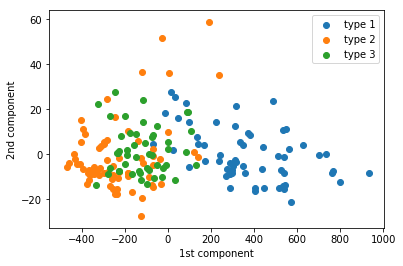

In [58]:
# Plot each kind of wine
for kind in [1, 2, 3]:
    # Wine samples of this type
    idx = (y == kind)

    # Plot their components
    plt.scatter(
        X_2d[idx, 0], X_2d[idx, 1],
        label='type {}'.format(kind)
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

This code is very similar to what we saw in the previous unit. We create a boolean array idx for each type of wine and use it to plot the values from the X_2d variable. These are called the component scores. 


You can think of **this plot as a 2-dimensional view of the wine data where the two axes correspond to the two orthogonal directions with the largest variance in our original space with thirteen dimensions.** Since these axes are directions in our original space (they are vectors in this space), we can express them as a **linear combination of our thirteen features**. These vectors are called the loading vectors and we can get them from the components_ attribute of our pca estimator

In [59]:
# Get the loading vectors
pca.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714318e-03,  1.71408087e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340622e-03,  2.15498179e-03,  4.59369256e-03,
         2.64503928e-02,  9.99344186e-01,  8.77962322e-04,
        -5.18505265e-05, -1.35447893e-03,  5.00440045e-03,
         1.51003527e-02, -7.62534250e-04, -3.49536416e-03,
        -1.77738095e-02]])

In [60]:
pca.components_.shape

(2, 13)

In our case, this array has a shape of (2, 13) since we computed the first two principal components of our 13-dimensional data. You can think of each value in this matrix as an indication of how parallel each principal axis is to our features. For instance, the value pca.components_[1, 0] indicates how parallel the second principal component is to the first feature (alcohol). A value equal to one indicates that the axis is perfectly parallel to the feature and a value of zero indicates that the axis is perpendicular to it.

Let's create a DataFrame to visualize our two loading vectors

In [61]:
# Create DataFrame with variance and principal components
results_df = pd.DataFrame({
    'variance': X.var(axis=0),
    '1st component': pca.components_[0],
    '2nd component': pca.components_[1]
}).set_index(features.columns)

# Sort DataFrame by variance
results_df.sort_values('variance', ascending=False)

,variance,1st component,2nd component
proline,98609.600966,0.999823,-0.017774
magnesium,202.843328,0.017868,0.999344
alkalinity,11.090031,-0.004671,0.026450
color,5.344256,0.002327,0.015100
malic acid,1.241004,-0.000681,0.002155
flavonoids,0.992114,0.001567,-0.000052
alcohol,0.655360,0.001659,0.001203
od2380/315,0.501254,0.000705,-0.003495
phenols,0.389489,0.000990,0.000878
pas,0.325754,0.000601,0.005004


In this code, we create a results_df DataFrame with the features as indexes and the loading vectors as columns. Note that we use the features DataFrame that we created with the X/y arrays above to set the index of the DataFrame with set_index(). Also, we add a variance column with the variance of each feature in X by calling X.var(axis=0) and sort the DataFrame with sort_values().

As we can see, the first principal component has a value extremely close to one for the proline feature and the second component has a value extremely close to one for the magnesium feature. **In other words, the plot from above corresponds to a plot of the proline and magnesium variables.**

Let's verify that by plotting these two features

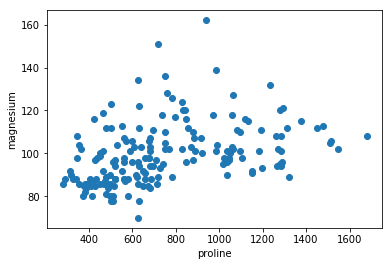

In [62]:
# Plot proline and magnesium variables
plt.scatter(
    X[:, 12], # Proline attribute
    X[:, 4] # Magnesium attribute
)
plt.xlabel('proline')
plt.ylabel('magnesium')
plt.show()

This plot is similar to the one from above. The only difference is the scale of the axes. We won't go into the details, but in short, this is because PCA ensures that the loading vectors have a length of one which modifies the scale of the data after the projection.

In our case, PCA uses these two features as the components because they have the largest variance (you can verify this in the table from above). Remember that the algorithm tries to find the axes that capture as much of the variation in the data as possible. For this reason, the algorithm will favor variables with a large variance.

### Standardizing data

To avoid this issue, we need to standardize the data


In [63]:
from sklearn.preprocessing import StandardScaler

# Create Standard scaler
scaler = StandardScaler()

# Rescale data
X_rescaled = scaler.fit_transform(X)

# Create PCA transformer
pca2 = PCA(n_components=2)

# Apply PCA to rescaled data
X_2d_rescaled = pca2.fit_transform(X_rescaled)

In this code, we create a StandardScaler object and rescale the data with the fit_transform() function. We then create a new PCA estimator and use it to create a 2-dimensional view X_2d_rescaled of our rescaled data. Since we project the same data that we use to find the principal components, we can combine the two operations by calling fit_transform(X_rescaled).

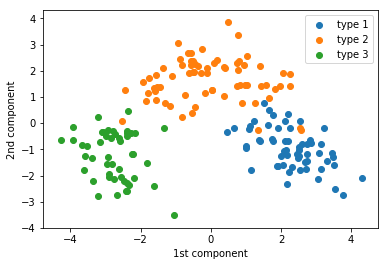

In [64]:
# Plot each kind of wine
fig = plt.figure()
for kind in [1, 2, 3]:
    # Wine samples of this type
    idx = (y == kind)

    # Plot their components
    plt.scatter(
        X_2d_rescaled[idx, 0], X_2d_rescaled[idx, 1],
        label='type {}'.format(kind)
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

It's interesting to note that the wine samples occupy a different region of this new feature space. In that sense, it seems that PCA was able to learn by itself some higher level information from the thirteen features i.e. the different types of wine.

Again, let's try to analyze each component by inspecting the weights of the loading vectors in the components_ attribute

In [65]:
# Create DataFrame with variance and principal components
results_df2 = pd.DataFrame({
    'variance': X_rescaled.var(axis=0),
    '1st component': pca2.components_[0],
    '2nd component': pca2.components_[1]
}).set_index(features.columns)

# Sort DataFrame by the coefficients of the 1st loading vector
results_df2.sort_values('1st component', ascending=False)

,variance,1st component,2nd component
flavonoids,1.0,0.422935,0.003347
phenols,1.0,0.394655,-0.065063
od2380/315,1.0,0.376167,0.164478
pas,1.0,0.313434,-0.039307
fue,1.0,0.296690,0.279282
proline,1.0,0.286760,-0.364883
alcohol,1.0,0.144326,-0.483648
magnesium,1.0,0.141997,-0.299617
ash,1.0,-0.002056,-0.316068
color,1.0,-0.088623,-0.529996


This time, all features have a variance of one since we standardized them. As we can see the first loading vector has a large coefficient for the flavonoids and phenols features whereas the second loading vector has a large negative coefficient for the color and alcohol ones. In fact, a negative coefficient simply means that the loading vector points in the direction opposite to the feature axis. For instance, the row that corresponds to the alcohol feature has the weights 0.14 and -0.48 which means that the second loading vector is more parallel to the axis of the alcohol feature than the first loading vector, but points in the opposite direction since the value is negative.

### PCA biplots

We can use these weights to plot each feature in our 2d plot

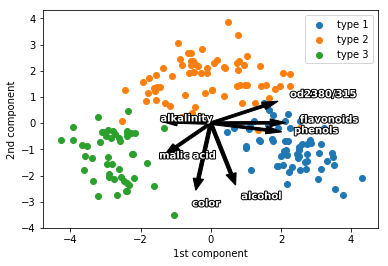

In [66]:
import matplotlib.patheffects as path_effects

# Plot each kind of wine
for kind in [1, 2, 3]:
    # Wine samples of this type
    idx = (y == kind)

    # Plot their components
    plt.scatter(
        X_2d_rescaled[idx, 0], X_2d_rescaled[idx, 1],
        label='type {}'.format(kind)
    )

# Plot a few features using the weights in the loading vectors
for feature in ['flavonoids', 'phenols', 'malic acid',
                'alkalinity', 'alcohol', 'color', 'od2380/315']:
    # Get weights
    weight1 = results_df2.loc[feature, '1st component']*4 # rescale them
    weight2 = results_df2.loc[feature, '2nd component']*4 # (4 is arbitrary)

    # Plot arrows
    plt.arrow(
        0, 0, # Vector starts at (x,y)=(0,0)
        weight1, weight2, # ends at (x,y)=(weight1, weight2)
        color='black', width=0.1)

    # Add text
    text = plt.text(
        weight1 * 1.5, # x location (1.5 is arbitrary)
        weight2 * 1.5, # y location
        feature, # Feature name
        weight='bold', color='white')

    # Make the text stand out
    text.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground='black'),
        path_effects.Normal()])

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

In this code, we extract the weights weight1 and weight2 from the two loading vectors for the flavonoids, phenols, malic acid, alkalinity, alcohol and color features. We can then plot them using the arrow() function. Note that we need to rescale these arrows to make them visible. To achieve this, we simply multiply each weight by four which seems to work in this case. Finally, we annotate each arrow with the feature name using the text() function from Pyplot. Again, we set the position of the text a bit farther away from the arrowheads by multiplying the component scores by 1.5.

The resulting graph is called a **biplot**

Biplots gives us an overview of our data with features represented as vectors. For instance, we can see that the second type of wine (in orange) has a lighter color than the two other ones since the color vector points in the direction opposite to its samples. We can also see that the first type of wine (in blue) has more phenols than the third one (in green) which is more alkaline and has more malic acid. Regarding alcohol, the second type of wine (in orange) has the least alcohol content.

### Explained variance ratio

We saw above that we lose some information by projecting the data points onto the principal axes. We won't go into the details, but we can quantify this amount of information by measuring the proportion of variance left after projecting the data onto each principal axis. Scikit-learn stores these quantities in the explained_variance_ratio_ attribute

In [67]:
# Get explained variance
pca2.explained_variance_ratio_

array([0.36198278, 0.1920793 ])

In our case, 36% of the total variance is contained in the first principal component and 19% in the second one. In that sense, the plot from above shows 55% of the total information. In our case, we set the number of components to two. But we can also apply PCA without specifying the number of components

In [68]:
# Create PCA transformer
pca3 = PCA(n_components=None)

# Apply PCA to rescaled data
pca3.fit(X_rescaled)

# Proportion of variance explained
pve = pca3.explained_variance_ratio_
pve

array([0.36198278, 0.1920793 , 0.11123553, 0.07069848, 0.06563048,
       0.04935783, 0.04238743, 0.0268125 , 0.02222013, 0.01929513,
       0.01736819, 0.01298058, 0.00795163])

In this case, Scikit-learn computes all the principal components. Since we didn't reduce the dimensionality of our data (think of it as a rotation of the data), we don't lose any information and the values in the pve array should sum to one.

### Scree plots
In practice, we usually compute all the components and their explained variance scores to produce a **scree plot which is simply a bar chart with the proportion of variance explained for each component**. This way, we can visualize how much information corresponds to each principal component and determine the number of dimensions to keep when applying PCA

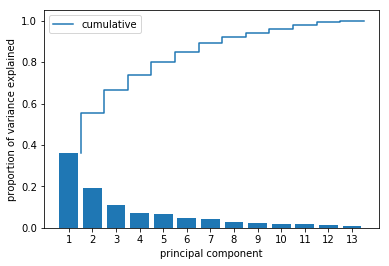

In [69]:
import numpy as np

# Create bar plot
xcor = np.arange(1, len(pve) + 1) # 1,2,..,n_components
plt.bar(xcor, pve)
plt.xticks(xcor)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    xcor+0.5, # 1.5,2.5,..,n_components+0.5
    pve_cumsum, # Cumulative sum
    label='cumulative'
)

# Add labels
plt.xlabel('principal component')
plt.ylabel('proportion of variance explained')
plt.legend()
plt.show()

In this code, we create the bar chart with the values in the pve variable using the bar() function from Pyplot. We also compute the cumulative sum of its values using the cumsum() function from Numpy. The i-th element of the pve_cumsum array tells us the amount of information contained in the first 
iaxes

In [70]:
pve_cumsum = [
    pve[0], # prop. of var. explained in 1st axis
    pve[0]+pve[1], # .. in 1st and 2nd axes
    pve[0]+pve[1]+pve[2], # .. in 1st, 2nd and 3rd axes
    pve[0]+pve[1]+pve[2]+pve[3], # .. and so on
    # ...
]

We can then plot the cumulative sum values using the step() function from Pyplot. Note that we shift the "step curve" by adding 0.5 to the x coordinates xcor. That way, the curve starts at position 1.5

We can now use this plot to determine the number of components. For instance, **to keep 80% of the information contained in our data, we would need to set the number of components to 5**. In this case, we would need to use the pairplot approach from above to plot these five dimensions.

### Summary
In this unit, we learned about PCA which is one way to perform dimensionality reduction. In practice, we often use this technique to visualize high-dimensional data sets in a 2d or 3d plot. **However, it can also help in supervised learning scenarios to reduce overfitting and increase the prediction accuracy and speed when the number of dimensions is too large.** In this case, we use PCA as a preprocessing step and usually set the number of components using a scree plot or by tuning it with grid search.

In that sense, PCA can be used in a great variety of situations. However, note that there are other dimensionality reduction techniques such as **t-SNE which focus on the data visualization aspect**. For reference, you can read more about this in the Manifold learning guide from Scikit-learn : https://scikit-learn.org/stable/modules/manifold.html


Q&A :
The canonical PCA in sklearn works with numerical data. If you want to consider categorical features in the PCA analysis, you need to properly encode them ahead (one-hot encoding for nominal and integer encoding for ordinal).

Unsupervised learning is more challenging in terms of quantitative performance evaluation and interpretability of the final results compared to supervised learning. In general, the interpretability of the model behavior for both ML paradigms represents a main challenge with many open questions in research.

There are various metrics to **evaluate the clustering performance** (mean distortion, silhouette ratio, calinski-harabasz ratio, normalized mutual information, adjusted rand index,… ). To interpret the results, there are different attempts in the literature. 
> -The first one is to use more interpretable clustering algorithms than K-means (e.g. tree-based clustering, hierarchical agglomeration clustering,….) or other distance metrics. 

> - Another approach is what you have proposed; using clustering as a labeling technique and then pass the labels to an interpretable classifier (e.g. decision tree). 

> - A third approach, usually used in NLP topic modeling, is to perform two unsupervised learning tasks (cluster the samples according to features, and then cluster the features within each cluster). 

> - Another trend in literature is to combine clustering and feature selection (feature selection approaches for clustering) in order to have more interpretable clusters. 

> - A more advanced approach is to use generative models for clustering problems (i.e. try to learn the underlying distribution of the data). The latter is a model-based approach, compared to the former discriminative similarity-based approaches. There are indeed other techniques to tackle the interpretability problem.

The application and utility of each of these approaches depend on the specific domain.